# TP 3: Introduction aux modèles et à la descente de gradient

Les *réseaux de neuronnes* sont des outils d'apprentissage profond très utilisés de nos jours. 
Ces méthodes sont utilisées en utilisant plusieurs couches de neuronnes.

Ce TP est une introduction à la *descente de gradient*, un outils fondamental pour l'utilisation des perceptrons et réseaux de neuronnes.

### 1. Le choix du modèle

 Lorsque nous souhaitons faire de la *régression* sur un nuage de points, nous souhaitons approcher ce nuage de points par une fonction bien connue.

 Oui, mais quelle fonction bien connue ?

 Ce *choix* revient à l'objet situé entre la chaise et le clavier. Il y a plusieurs choix de modèles que nous allons détaillé ci-dessous:
 - le modèle linéaire (qui donne une *régression linéaire*);
 - le modèle polynômial (qui donne une *régression polynomiale*);
 - le modèle logistique (qui donne une *régression logistique*).

 Les résultats que nous allons obtenir dépendent du *choix* de modèle. En effet, si nous choisissons un modèle linéaire pour représenter un nuage de points situé sur le trajet du parabole, il ne faut pas s'attendre à des miracles.

 Ainsi, le choix du modèle représente un *biais* dans la représentation des données. 

 Une alternative naturelle peut s'agir d'augmenter le nombre de paramètres pour trouver un bon modèle. Dans le cas des modèles polynomiaux par exemple, cela signifie que nous considérons des termes de degrés supérieurs. Certes le modèle réalisera peut-être une meilleure approximation *ponctuellement* mais cela ajoute une instabilité numérique sur les paramètres. En effet, vu leurs nombre une petite erreur sur chacun des paramètres peut engendrer une erreur colossale lors des calculs. On ce cas, on dit que le modèle possède une grande *variance*.

 L'erreur d'un modèle se compose ainsi de trois éléments:
 - son biais;
 - sa variance;
 - l'erreur inhérente du jeu de donnée à ajuster. Ceci peut correspondre au *bruit* dans celles-ci.

Par exemple, si nous considérons le jeu de données généré par le code suivant, une régression linéaire ne sera pas une bonne idée.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

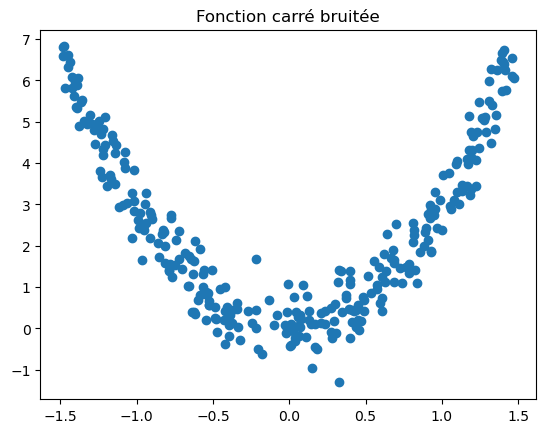

In [2]:
np.random.seed(42)
X = np.random.rand(300, 1)*3 - 1.5
y = 3 * X[:, 0] ** 2 + 0.5 * np.random.randn(300)

plt.plot(X,y,'o')
plt.title("Fonction carré bruitée")
plt.show()

## 2. Une méthode d'optimisation: la descente de gradient

Comme pour les arbres de décisions, l'ordinateur va chercher à optimiser son score de *performance/erreur*. La méthode utilisée par les réseaux de neuronnes est appelée la *descente de gradient* qui est détaillée ci-dessous.

### 2.A. Le fonctionnement de la descente de gradient: Cas à une variable

La descente de gradient est une méthode d'optimisation fonctionnant dans le cas des fonctions dérivables

#### 2.A.1 Premier exemple

Considérons une fonction $f:\mathbb{R}\rightarrow \mathbb{R}$ dérivable.

**Formule de Taylor-Young**: soit $x\in\mathbb{R}$ et $h>0$, alors:
$$
f(x+h)=f(x)+f'(x)\times h+o(h).
$$
Autrement dit, à proximité de $x$ la fonction $f$ se comporte comme la fonction affine suivante:
$$
f(x+h)=f(x)+f'(x)\times (x-h).
$$

Sur la fonction en bleu suivant les droites en pontillés représente les approximations de la fonction avec des fonctions liénaires:

![alt text](TY.png) 

Ainsi, en empruntant la direction $h=-f'(x)$, nous obtenons:
$$
f(x+h)=f(x)-f'(x)^2<f(x).
$$
Nous venons donc de trouver un point où l'image est plus petite.

La méthode de descente de gradient se base sur l'idée suivante:
1. On commence à un endroit $x_0$ choisi au hasard;
2. On cherche alors un autre point $x_1$ tel que $f(x_1)<f(x_0)$;
3. A partir du point précédent $x_n$, on cherche un point $x_{n+1}$ tel que $f(x_{n+1})<f(x_{n})$;
4. Dès que $f'(x)=0$ ou que l'amélioration du minimum n'est plus significative.

Il y aura plusieurs *hyperparamètres à règler* concernant la descente de gradient. Le bon fonctionnement de la méthode peut reposer sur le *bon choix des hyperparamètres* qui se fait ad hoc.

**TODO**: On considère la fonction $x\rightarrow (x-3)^2+2$, tracer son graphe sur une fenêtre *matplotlib* centrée en $3$ de longueur $6$.

La dérivé de la fonction $x\mapsto (x-3)^2+2$ se calcule aisément en tout point:
$$
x \mapsto 2x-6.
$$
Connaissant cette fonction dérivée, nous pouvons implémenter un algorithme de descente de gradient de *taux d'apprentissage* $\eta$ avec un nombre maximal d'*epoch* donné par:
1. tirer un point $x_0$ au hasard dans l'espace de recherche;
2. pour tout $n\in\mathbb{N}$, on calculer $f'(x_n)$ puis obtenir le point suivant:
$$
x_{n+1}=x_n-\eta \times f'(x_n).
$$
3. Dès que l'amélioration n'est plus suffisante ou que le nombre d'epoch maximal est atteint, arrêté l'algorithme.

**TODO**: coder un algorithme *Gradient_descent(eta, tol,max_epoch,radom_state)* réalisant cette algorithme sur la fonction décrite ci-dessus.

In [21]:
def Gradient_descent(eta, tol , max_epoch, random_state=42):
    pass

**TODO**: Effectuer les descentes de gradient en faisant varier le taux d'apprentissage $\eta=0.01, 1, 0.001$, max_epoch$=50$ et  $tol=10^{-8}$. Observer les résultats.

## 2.A.2 Un autre exemple

Considérons le polynôme de degré $4$ généré par le code suivant:


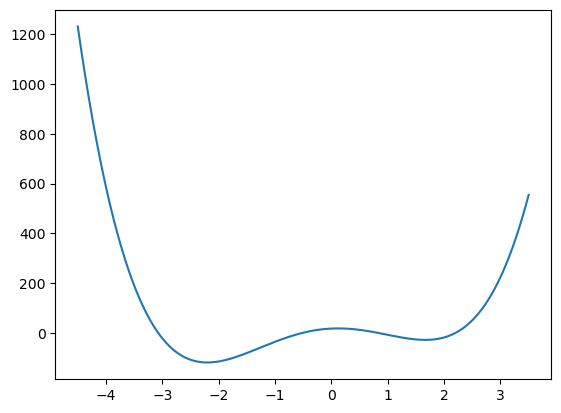

In [8]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Définition et affichage de la fonction à minimiser

# coefficients polynomiaux bien choisis pour l'exemple 😇
example_coeffs = (
    16.8350101057134,
    10.621467774429892,
    -45.29852223580801,
    3.380171476274114,
    6.068075889020002,
)
param_min, param_max = -4.5, 3.5
param_vals_continuous = np.linspace(param_min, param_max, 500)

poly_num = Polynomial(example_coeffs)
poly_vals= poly_num(param_vals_continuous)

plt.plot(param_vals_continuous, poly_vals)
plt.show()

Nous constatons la présence de deux minima où le minima global est entre $-3$ et $-2$. Essayons de le débusquer en utilisant une descente de gradient.

**TODO**: calculer la dérivée de la fonction polynomiale ci-dessus pour implémenter la descente de gradient.

**TODO**: implémenter la descente de gradient sur cette fonction puis tracer pour les paramètres aléatoires suivants les graphes de la descente de gradient:

In [39]:
def Gradient_descent2(eta, tol , max_epoch, starting_point):
    pass

**TODO**: que remarquez-vous de la descente de gradient en commençant au point $0$ ?

### 2.B. Le fonctionnement de la descente de gradient: cas à plusieurs variables

Dans le cas à plusieurs variables, cette fois-ci nous cherchons à optimiser une fonction $f:\mathbb{R}^k \mapsto \mathbb{R}$ où $k>1$ est son nombre de variables.

L'idée de la descente de gradient reste la même néanmoins, la formule de Taylor admet une autre écriture dans ce cas:
$$
f(x+h)=f(x)+\nabla f(x) \cdot h+o(h),
$$
où $x$ et $h$ sont maintenant des vecteurs et $\nabla f (x)$ est le *gradient de f* calculé en $x$ et $\nabla f(x) \cdot h$ est le produit scalaire du gradient avec $h$. Le gradient de $f$ peut s'écrire comme suit lorsque $x$ et $h$ sont des éléments de $\mathbb{R}^k$ :
$$
\nabla f(x)=\begin{pmatrix}
\dfrac{df}{dv_1}(x) \\ \dfrac{df}{dv_k}(x) \\ \vdots \\ \dfrac{df}{dv_k}(x)
\end{pmatrix}
$$

On considère la fonction:
$$
f(x,y)=x^2+(y-2)^2.
$$

**TODO**: tracer le graphe de cette fonction en utilisant la commande *plot3surface* de matplotlib.

**TODO**: Calculer le gradient de cette fonction.

**TODO**: coder un algorithme de descente de gradient pour cette fonction.

In [31]:
def Gradient_descent3(eta, tol , max_epoch, starting_point):
    pass

**TODO**: tracer le parcours de la descente de gradient sur la figure réalisée précédement.

## 2. Lien entre l'optimisation et la régression

### 2.A. La régression linéaire

En pratique, lorsque nous souhaitons effectuer une régression sur un jeu de données, nous choisissons un modèle et des paramètres permettant de règler la finesse du modèle que nous souhaitons choisir. Dans la suite de ce TP, nous considérons le nuage de points suivant:

In [64]:
rng_seed=42
def get_dataset(
    params=(5.0, -2.0),
    x_span=(-3.0, 3.0),
    n_data=100,
    noise=6.5,
    rng=np.random.default_rng(rng_seed),
):
    slope, bias = params
    x = rng.uniform(*x_span, n_data)
    y = slope * x + bias + noise * rng.normal(0.0, 1.0, x.shape)
    return x, y

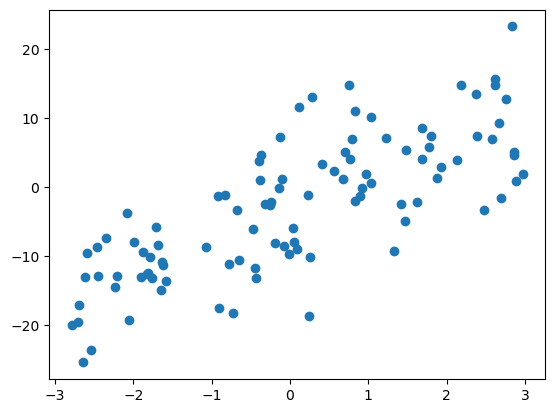

In [80]:
x_data, y_data=get_dataset()
plt.plot(x_data,y_data, 'o')
plt.show()


Il s'agit d'un jeu de données affines altérées par un bruit.
A partir de ce jeu de points nous allons réaliser une interpolation liénaire. Ceci consiste à tenter d'approcher le jeu de données suivantes par:
$$ y \approx f(x; w, b) = w x + b $$
où $(x,y)$ est un point du jeu de données.

Ainsi, il faut déterminer les meilleurs paramètres $(w,b)$ de telle sorte que ce modèle linéaire "approche" le mieux possible le jeu de données.

**TODO**: En utilisant la fonction *Polynomial.fit*, calculer la droite de régression linéaire pour ce jeu de données.

### 2.B. Lien avec la descente de gradient


Comment déterminer les paramètres $w$ et $b$ donnés précédement ? 
Vous avez déjà fait des régressions linéaires, peut-être avec `polyfit`, peut-être avec d'autres méthodes.
Toutes ces méthodes sont basées sur un problème d'optimisation, appelé la **méthode des moindres carrés**, où on cherche $w, b$ qui minimisent la fonctionnelle 

$$ {\rm MSE}(w, b) := \frac{1}{N} \sum_{k = 1}^N \bigl( w x^{(k)} + b - y^{(k)} \bigr)^2 $$

où $(x^{(k)},y^{(k)})$ est le $k$-ième point dans le jeu de données.

L'acronyme ${\rm MSE}$ signifie *mean squared error*. 

Dans notre exemple, $w$ et $b$ seront des nombres réels.

####  2.B.1. Calcul de l'erreur

**TODO:**  
Compléter la fonction ci-dessous qui, à partir d'une pente $w$ et d'un biais $b$, calcule l'erreur quadratique moyenne de la régression linéaire.

In [37]:
def mean_squared_error(w, b, x, y):
    """
    Calcule l'erreur quadratique moyenne pour un modèle de régression linéaire.

    Args:
        w (float): Le poids du modèle de régression linéaire.
        b (float): Le biais du modèle de régression linéaire.
        x (float array, optionnel): Les données d'entrée.
        y (float array, optionnel): Les valeurs cibles.

    Returns:
        float: L'erreur quadratique moyenne du modèle de régression linéaire.
    """
    pass

### 2.2. L'erreur pour différents paramètres

On peut voir l'espace des paramètres comme une carte : la pente correspond à la *longitude* et le biais à la *latitude*. 
En chaque point, i.e. pour chaque pente et chaque biais, on peut associer une altitude, qui correspond à l'erreur quadratique moyenne. 
Cela définit une topographie, un terrain avec du relief.
Pour cet exemple précis, on verra que la topographie présente peu d'intérêt, il s'agit juste d'un puits, mais affichons là quand même.

Pour cela, il faut calculer le gradient de la fonction qui a $w$ et $b$ associe l'erreur au sens des moindres carrés du modèle avec pour paramètre $w$ et $b$. 

$$
\begin{align*}
\frac{d MSE}{d w}&=\frac{2}{N}\sum_{k=1}^N x^{(k)} \cdot \left( w\cdot x^{(k)}+b -y^{(k)}\right), \\
\frac{d MSE}{d b}&=\frac{2}{N}\sum_{k=1}^N ( w\cdot x^{(k)}+b -y^{(k)}).
\end{align*}
$$

**TODO**: effectuer la descente de gradient pour approcher ce nuage de points puis afficher chacune des droites considérées dans le nuage de points par la méthode d'approximation.

In [7]:
import random

random.seed(10)
poids = random.random()
biais = random.random()
eta = 0.1
epoque = 10
labels=y_data
entrees=x_data
for _ in range(epoque):
    for i in range(len(entrees)):
        delta = eta*(labels[i]-poids*entrees[i]+biais)
        poids[0] = poids[0] + delta*entrees[i][0]
        poids[1] = poids[1] + delta*entrees[i][1]
        biais = biais+delta
    representation(poids,biais)
    plt.scatter(scatter_x, scatter_y, c=labels)
    plt.show()


NameError: name 'y_data' is not defined